# DBScann #

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np

X, y_true = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
y_clust = dbscan.labels_
# Number of clusters in labels, ignoring noise (i.e. labels == -1) if present.
n_clusters_ = len(set(y_clust)) - (1 if -1 in y_clust else 0)
n_noise_ = list(y_clust).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1


In [2]:
from sklearn import metrics

# A clustering result satisfies homogeneity, if all of its clusters contain only data points which are members of a single class:
print(f"Homogeneity: {metrics.homogeneity_score(y_true, y_clust):.3f}")

# A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster: 
print(f"Completeness: {metrics.completeness_score(y_true, y_clust):.3f}") 

#The V-measure is the harmonic mean between homogeneity and completeness:
print(f"V-measure: {metrics.v_measure_score(y_true, y_clust):.3f}")

# The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are 
# assigned in the same or different clusters in the predicted and true clusterings.
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_true, y_clust):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y_true, y_clust):.3f}"
)

# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
# The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, y_clust):.3f}") 

Homogeneity: 1.000
Completeness: 0.990
V-measure: 0.995
Adjusted Rand Index: 0.998
Adjusted Mutual Information: 0.995
Silhouette Coefficient: 0.090


Silhouette-Coefficient negative: the mean Silhouette Coefficient over all points is calculated. <br> 
The mean intra-cluster distance ist large in each of the "half-moons" resulting in a negative SC.



In [3]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

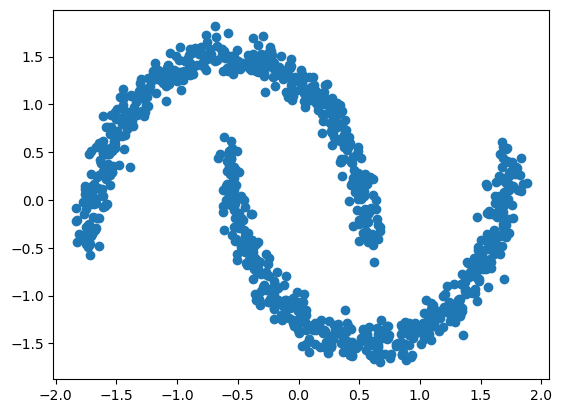

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.show()

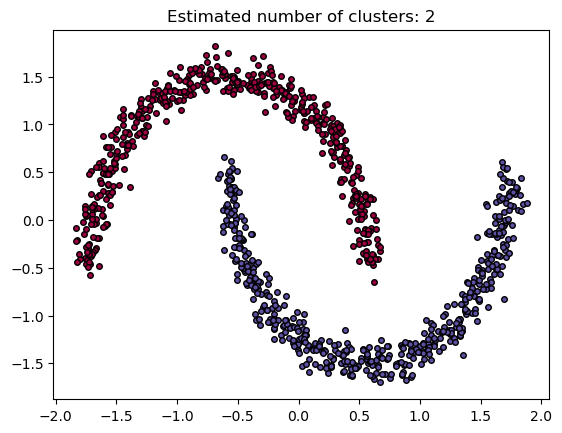

In [5]:
unique_labels = set(y_true)
core_samples_mask = np.zeros_like(y_true, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(l) for l in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = y_true == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=4,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=4,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [44]:
print(f"# core_sample_indices: {len(dbscan.core_sample_indices_)}") # indeces of core samples

# core_sample_indices: 989


In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [7]:
X_new = np.array([[-0.5, 0], [0,0.5], [1, -0.1], [2,1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [8]:
knn.predict_proba(X_new)

array([[0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.26, 0.74],
       [1.  , 0.  ]])

In [9]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx] # clustering labels of the core-samples among the closest neighbours
# y_pred = dbscan.labels_[y_pred_idx] # labels of the nearest neighbour to each element from X_new
y_pred[y_dist > 0.2] = -1
print(y_pred.shape)
print(y_pred.ravel())

(4, 1)
[-1  0  1 -1]
